In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
col_pal =  plt.rcParams["axes.prop_cycle"].by_key()["color"]
import plotly.express as px
plt.style.use ("fivethirtyeight")
from fredapi import Fred
import env
pd.set_option("max_columns",500)
import json

In [2]:
fred_key = ""
# from kaggle_secrets import UserSecretsClients
# secrets = UserSecretsClients()
# fred_key = secrets.getsecret("fred-api")

In [3]:
fred=Fred(api_key = fred_key)

In [4]:
fred

In [5]:
# fred.search("S&P", order_by = "popularity")
fred.search("S&P").head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2022-11-07,2022-11-07,S&P 500,2012-11-05,2022-11-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-11-04 19:10:49-05:00,84,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2022-11-07,2022-11-07,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2022-11-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-11-07 08:36:09-06:00,53,"Copyright, 2016, Chicago Board Options Exchang..."
VXOCLS,VXOCLS,2022-11-07,2022-11-07,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,36,This series is no longer being updated by the ...
CSUSHPINSA,CSUSHPINSA,2022-11-07,2022-11-07,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-10-25 08:02:01-05:00,91,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2022-11-07,2022-11-07,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2022-10-25 08:02:03-05:00,80,"For more information regarding the index, plea..."


# Pull Raw Data 


In [6]:
sp500 = fred.get_series(series_id = "SP500")

<AxesSubplot:title={'center':'S&P 500'}>

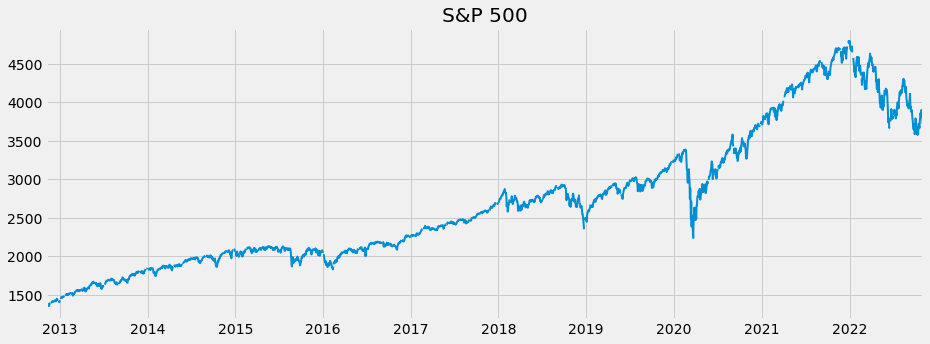

In [7]:
sp500.plot(figsize= (14,5), title = "S&P 500", lw = 2)

# 4. Pull multiple data series

In [8]:
unemp_results = fred.search("unemployment")

In [9]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2022-11-07,2022-11-07,Unemployment Rate,1948-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-04 07:44:03-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2022-11-07,2022-11-07,Unemployment Rate,1948-01-01,2022-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-11-04 07:43:03-05:00,57,The unemployment rate represents the number of...
NROU,NROU,2022-11-07,2022-11-07,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,71,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2022-11-07,2022-11-07,Unemployment Level,1948-01-01,2022-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2022-11-04 07:44:06-05:00,70,The series comes from the 'Current Population ...
CCSA,CCSA,2022-11-07,2022-11-07,Continued Claims (Insured Unemployment),1967-01-07,2022-10-22,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2022-11-03 07:33:03-05:00,70,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN530630000000003A,LAUCN530630000000003A,2022-11-07,2022-11-07,"Unemployment Rate in Spokane County, WA",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:50:43-05:00,1,These data come from the Current Population Su...
LAUCN060250000000003A,LAUCN060250000000003A,2022-11-07,2022-11-07,"Unemployment Rate in Imperial County, CA",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:57:58-05:00,1,These data come from the Current Population Su...
LAUCN484530000000003A,LAUCN484530000000003A,2022-11-07,2022-11-07,"Unemployment Rate in Travis County, TX",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 11:14:46-05:00,1,These data come from the Current Population Su...


In [10]:
#PULL FROM ID IN UNEMP RESULTS
unemp_rate = fred.get_series("UNRATE")

In [11]:
unemp_rate.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

<AxesSubplot:>

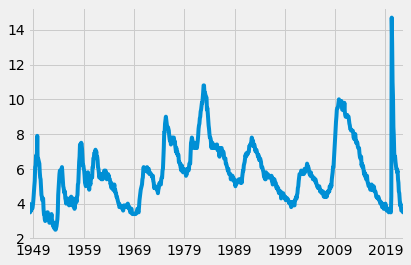

In [12]:
unemp_rate.plot()

In [147]:
unemp_df = fred.search("unemployment state", filter = ("frequency", "Monthly" ))
# running a query to find specific data that I am looking for
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df["title"].str.contains("Unemployment Rate")]

In [148]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'M0892AUSM156SNBR', 'CAUR', 'M0892BUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'LNS14000002', 'TXUR', 'U2RATE', 'NYUR',
       'FLUR', 'LNS14027662', 'LNS14000009', 'LNS14027660', 'LNS14000003',
       'ALUR', 'LNS14000001', 'MIUR', 'ILUR', 'KYUR', 'LRUN64TTUSM156S',
       'OHUR', 'NCUR', 'PAUR', 'INUR', 'AKUR', 'LNS14032183', 'WVUR', 'MNUR',
       'COUR', 'LNS14000012', 'MAUR', 'MOUR', 'NDUR', 'NMUR', 'NJUR', 'WIUR',
       'GAUR', 'HIUR', 'WAUR', 'TNUR', 'AZUR', 'LASMT261982000000003', 'VAUR',
       'IAUR', 'UTUR', 'LAUR', 'OKUR', 'ORUR', 'LNS14027659', 'SCUR', 'ARUR',
       'MEUR', 'LNS14000060', 'NVUR', 'MDUR', 'KSUR', 'SDUR',
       'LASMT391746000000003', 'LNS14000018', 'MTUR', 'LNS14024887', 'WYUR',
       'MSUR', 'CTUR', 'NEUR', 'LNS14000036', 'IDUR', 'LNS14000032', 'PRUR',
       'DCUR', 'LNS14027689', 'VTUR', 'NHUR', 'CNERUR', 'DEUR', 'RIUR',
       'LNS14000028', 'LRHUTTTTUSM156S', 'LNS14024230', 'CMWRUR',
       'LNS14000026', 'LNS1

In [149]:
all_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
uemp_result = pd.concat(all_results, axis = 1)

In [114]:
# uemp_result.isna().mean()
# pd.set_option('display.max_rows', 80)


In [150]:
uemp_result.isna().mean()


UNRATE                  0.191719
LNS14000006             0.450945
M0892AUSM156SNBR        0.856886
CAUR                    0.495050
M0892BUSM156SNBR        0.925293
LNS14000024             0.191719
LNS14000031             0.450945
LNS14000002             0.191719
TXUR                    0.495050
U2RATE                  0.396940
NYUR                    0.495050
FLUR                    0.495050
LNS14027662             0.666967
LNS14000009             0.463546
LNS14027660             0.666967
LNS14000003             0.256526
ALUR                    0.495050
LNS14000001             0.191719
MIUR                    0.495050
ILUR                    0.495050
KYUR                    0.495050
LRUN64TTUSM156S         0.431143
OHUR                    0.495050
NCUR                    0.495050
PAUR                    0.495050
INUR                    0.495050
AKUR                    0.495050
LNS14032183             0.785779
WVUR                    0.495050
MNUR                    0.495050
COUR      

In [151]:
# drop columns without the "UR" suffix
state_unemp = uemp_result.filter(regex="UR",axis=1)

In [152]:
state_unemp
pd.set_option('display.max_rows', 558)


In [153]:
state_unemp

,CAUR,TXUR,NYUR,FLUR,ALUR,MIUR,ILUR,KYUR,OHUR,NCUR,PAUR,INUR,AKUR,WVUR,MNUR,COUR,MAUR,MOUR,NDUR,NMUR,NJUR,WIUR,GAUR,HIUR,WAUR,TNUR,AZUR,VAUR,IAUR,UTUR,LAUR,OKUR,ORUR,SCUR,ARUR,MEUR,NVUR,MDUR,KSUR,SDUR,MTUR,WYUR,MSUR,CTUR,NEUR,IDUR,PRUR,DCUR,VTUR,NHUR,CNERUR,DEUR,RIUR,CMWRUR,CSOUUR,CWSTUR,CNEWUR,USAURAMS
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,4.2,4.1,4.4,2.8,2.6,4.3,4.5,3.7,3.9,3.4,4.5,2.4,4.6,3.6,1.8,3.4,3.7,2.8,2.5,4.9,3.9,2.9,2.9,4.2,3.8,3.3,3.3,2.8,2.6,2.0,3.8,2.9,3.5,3.2,3.2,3.0,4.7,4.0,2.4,2.3,2.6,3.1,3.8,4.0,1.9,2.5,6.1,5.5,2.2,2.0,4.1,4.5,2.7,3.3,3.4,3.8,3.5,NaN
2022-07-01,3.9,4.0,4.3,2.7,2.6,4.2,4.4,3.7,3.9,3.4,4.3,2.6,4.5,3.7,1.8,3.3,3.5,2.5,2.3,4.5,3.7,3.0,2.8,4.0,3.7,3.3,3.3,2.7,2.5,2.0,3.7,2.9,3.5,3.2,3.3,2.8,4.4,3.9,2.4,2.3,2.7,3.0,3.6,3.7,2.0,2.6,5.9,5.2,2.1,2.0,4.0,4.4,2.7,3.3,3.4,3.7,3.3,NaN
2022-08-01,4.1,4.1,4.7,2.7,2.6,4.1,4.5,3.8,4.0,3.5,4.2,2.8,4.6,3.9,1.9,3.4,3.6,2.5,2.3,4.4,4.0,3.1,2.8,4.0,3.7,3.4,3.5,2.6,2.6,2.0,3.5,3.1,3.7,3.1,3.4,3.1,4.4,4.3,2.5,2.3,2.8,3.1,3.6,4.1,2.1,2.7,5.8,5.1,2.1,2.0,4.1,4.5,2.8,3.4,3.4,3.7,3.4,NaN
2022-09-01,3.9,4.0,4.3,2.5,2.6,4.1,4.5,3.8,4.0,3.6,4.1,2.8,4.4,4.0,2.0,3.4,3.4,2.4,2.2,4.2,3.3,3.2,2.8,3.5,3.7,3.4,3.7,2.6,2.7,2.1,3.4,3.2,3.8,3.2,3.5,3.3,4.4,4.0,2.6,2.3,2.9,3.3,3.6,4.0,2.2,2.8,NaN,4.7,2.1,2.2,3.9,4.3,3.1,3.4,3.3,3.7,3.3,NaN


In [154]:
columns_to_drop = ["CMWRUR","CNERUR", "CSOUUR","CWSTUR","CNEWUR","USAURAMS"]

In [155]:
state_unemp = state_unemp.drop(columns_to_drop, axis = 1)

<AxesSubplot:>

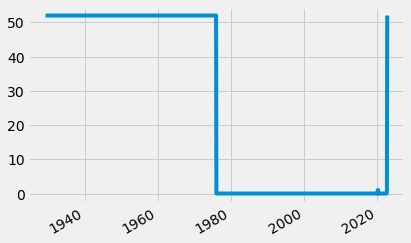

In [156]:
state_unemp.isna().sum(axis=1).plot()

In [157]:
state_unemp = state_unemp.dropna()

In [158]:
id_to_state = unemp_df["title"].str.replace("Unemployment Rate in","").to_dict()

state_unemp.columns = [id_to_state[c] for c in state_unemp.columns]

In [159]:
# plotting states unemployment rate
px.line(state_unemp)

## Covid period unemployment rate

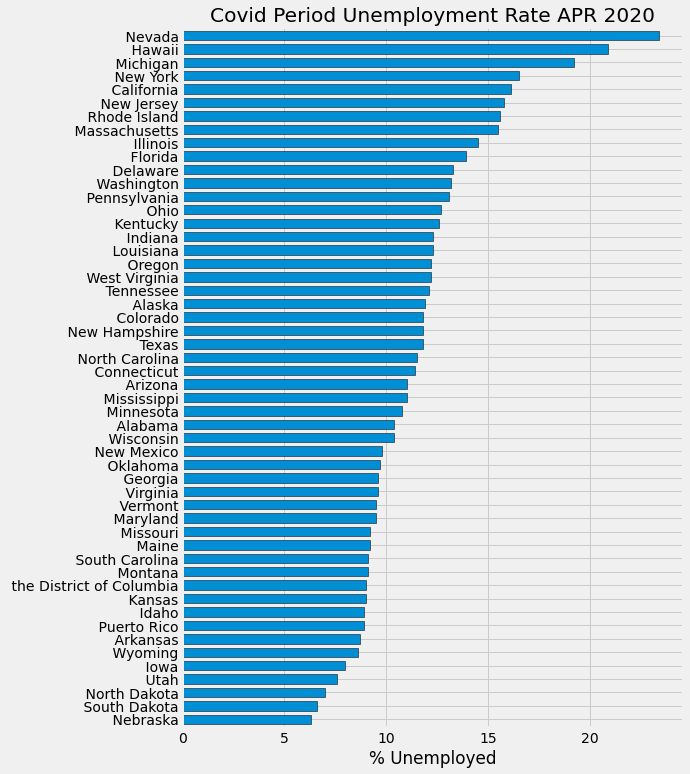

In [160]:
ax =state_unemp.loc[state_unemp.index == "2020-05-01"].T.sort_values("2020-05-01").plot(kind = "barh", 
                                                                                    figsize=(8, 12),
                                                                                    width = 0.7,
                                                                                    edgecolor = "black",
                                                                                    title = "Covid Period Unemployment Rate APR 2020")
ax.legend().remove()
ax.set_xlabel("% Unemployed")
plt.show()

# Job market participation rate

In [144]:
participation_df = fred.search("participation rate state", filter= ("frequency","Monthly"))
participation_df = participation_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [161]:
participation_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2022-11-08,2022-11-08,Labor Force Participation Rate,1948-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-04 07:44:03-05:00,86,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2022-11-08,2022-11-08,Labor Force Participation Rate - Women,1948-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-04 07:44:14-05:00,64,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2022-11-08,2022-11-08,Labor Force Participation Rate - Men,1948-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-04 07:44:15-05:00,58,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2022-11-08,2022-11-08,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-04 07:44:14-05:00,66,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2022-11-08,2022-11-08,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-04 07:44:19-05:00,53,The series comes from the 'Current Population ...
LBSSA13,LBSSA13,2022-11-08,2022-11-08,Labor Force Participation Rate for Georgia,1976-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-21 09:01:05-05:00,14,A state's labor-force participation rate is th...
LNS11300003,LNS11300003,2022-11-08,2022-11-08,Labor Force Participation Rate - White,1954-01-01,2022-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-11-04 07:44:29-05:00,27,The series comes from the 'Current Population ...
LBSSA27,LBSSA27,2022-11-08,2022-11-08,Labor Force Participation Rate for Minnesota,1976-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-21 09:01:01-05:00,28,A state's labor-force participation rate is th...
LBSSA06,LBSSA06,2022-11-08,2022-11-08,Labor Force Participation Rate for California,1976-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-21 09:01:02-05:00,21,A state's labor-force participation rate is th...


In [163]:
# drop columns without the "UR" suffix
paprt_df = participation_df.T.filter(regex="LBSSA",axis=1)

In [164]:
part_df = paprt_df.T

In [165]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LBSSA13,LBSSA13,2022-11-08,2022-11-08,Labor Force Participation Rate for Georgia,1976-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-21 09:01:05-05:00,14,A state's labor-force participation rate is th...
LBSSA27,LBSSA27,2022-11-08,2022-11-08,Labor Force Participation Rate for Minnesota,1976-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-21 09:01:01-05:00,28,A state's labor-force participation rate is th...
LBSSA06,LBSSA06,2022-11-08,2022-11-08,Labor Force Participation Rate for California,1976-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-21 09:01:02-05:00,21,A state's labor-force participation rate is th...
LBSSA53,LBSSA53,2022-11-08,2022-11-08,Labor Force Participation Rate for Washington,1976-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-21 09:01:16-05:00,5,A state's labor-force participation rate is th...
LBSSA01,LBSSA01,2022-11-08,2022-11-08,Labor Force Participation Rate for Alabama,1976-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-21 09:01:08-05:00,9,A state's labor-force participation rate is th...
LBSSA39,LBSSA39,2022-11-08,2022-11-08,Labor Force Participation Rate for Ohio,1976-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-21 09:01:08-05:00,20,A state's labor-force participation rate is th...
LBSSA21,LBSSA21,2022-11-08,2022-11-08,Labor Force Participation Rate for Kentucky,1976-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-21 09:01:02-05:00,23,A state's labor-force participation rate is th...
LBSSA23,LBSSA23,2022-11-08,2022-11-08,Labor Force Participation Rate for Maine,1976-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-21 09:01:03-05:00,21,A state's labor-force participation rate is th...
LBSSA12,LBSSA12,2022-11-08,2022-11-08,Labor Force Participation Rate for Florida,1976-01-01,2022-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2022-10-21 09:01:02-05:00,23,A state's labor-force participation rate is th...


In [173]:
state_labels = part_df["title"].str.replace("Labor Force Participation Rate for ","").to_dict()

all_results = []
for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_df = pd.concat(all_results, axis=1)

In [174]:
part_df.columns = [state_labels[c] for c in part_df.columns]

In [176]:
part_df.head()

,Georgia,Minnesota,California,Washington,Alabama,Ohio,Kentucky,Maine,Florida,Utah,Wisconsin,Colorado,Michigan,Texas,Missouri,Indiana,Iowa,Massachusetts,Illinois,Pennsylvania,Oregon,Mississippi,Maryland,Arizona,Oklahoma,Virginia,Tennessee,West Virginia,Nebraska,Louisiana,Hawaii,Alaska,Kansas,Nevada,Connecticut,Arkansas,Vermont,Idaho,Montana,New York,New Mexico,Wyoming,South Carolina,Delaware,New Hampshire,North Carolina,New Jersey,South Dakota,North Dakota,Rhode Island,District Of Columbia
1976-01-01,63.7,65.6,62.6,60.9,57.0,61.7,60.5,62.1,55.8,62.8,65.6,67.2,61.6,63.8,60.5,64.0,64.4,64.8,63.0,58.4,62.9,58.8,64.3,59.5,59.3,65.9,59.6,52.5,64.9,56.8,69.9,69.0,65.1,71.3,64.2,57.9,63.6,63.0,62.7,58.0,60.8,65.3,65.3,62.7,65.9,66.5,61.5,64.6,62.6,63.8,64.4
1976-02-01,63.6,65.5,62.4,60.7,56.9,61.7,60.3,61.9,55.7,62.6,65.5,67.0,61.5,63.5,60.3,63.9,64.3,64.7,63.0,58.3,62.7,58.6,64.2,59.2,59.2,65.8,59.4,52.4,64.9,56.6,69.6,68.4,65.0,70.8,64.1,57.8,63.4,62.8,62.5,58.0,60.5,64.9,65.2,62.5,65.6,66.3,61.4,64.4,62.4,63.7,64.5
1976-03-01,63.5,65.4,62.2,60.6,56.8,61.7,60.2,61.9,55.5,62.5,65.4,66.8,61.5,63.4,60.3,63.8,64.2,64.6,62.9,58.3,62.5,58.5,64.1,59.1,59.1,65.6,59.3,52.3,64.8,56.5,69.6,67.8,64.9,70.5,64.0,57.7,63.2,62.7,62.4,58.0,60.3,64.7,65.0,62.5,65.6,66.2,61.4,64.4,62.3,63.6,64.5
1976-04-01,63.5,65.4,62.2,60.6,56.8,61.6,60.1,61.8,55.5,62.5,65.4,66.6,61.6,63.5,60.4,63.8,64.1,64.6,62.9,58.3,62.4,58.5,64.1,59.1,59.0,65.5,59.3,52.3,64.8,56.4,69.4,67.9,65.0,70.4,64.1,57.7,63.5,62.7,62.3,58.0,60.3,64.9,64.9,62.4,65.7,66.2,61.5,64.3,62.5,63.7,64.5
1976-05-01,63.6,65.5,62.3,60.7,56.8,61.6,60.1,61.7,55.4,62.6,65.5,66.5,61.7,63.6,60.6,63.9,64.1,64.6,63.0,58.3,62.5,58.5,64.1,59.1,59.0,65.4,59.4,52.2,64.8,56.4,69.3,67.9,65.1,70.5,64.3,57.7,63.6,62.8,62.2,58.1,60.3,65.2,64.7,62.4,66.0,66.3,61.6,64.3,62.6,63.6,64.4


In [178]:
part_df.isna().sum()

Georgia                 0
Minnesota               0
California              0
Washington              0
Alabama                 0
Ohio                    0
Kentucky                0
Maine                   0
Florida                 0
Utah                    0
Wisconsin               0
Colorado                0
Michigan                0
Texas                   0
Missouri                0
Indiana                 0
Iowa                    0
Massachusetts           0
Illinois                0
Pennsylvania            0
Oregon                  0
Mississippi             0
Maryland                0
Arizona                 0
Oklahoma                0
Virginia                0
Tennessee               0
West Virginia           0
Nebraska                0
Louisiana               0
Hawaii                  0
Alaska                  0
Kansas                  0
Nevada                  0
Connecticut             0
Arkansas                0
Vermont                 0
Idaho                   0
Montana     

# Unemployment vs Participation

<AxesSubplot:>

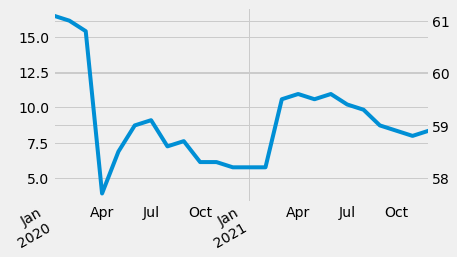

In [202]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
state_unemp.query("index >= 2020 and index < 2022")[" New York"].plot(ax = ax, label= "Unemployment")
part_df.query("index >= 2020 and index < 2022")["New York"].plot(ax = ax2, label= "Participation")



<AxesSubplot:>

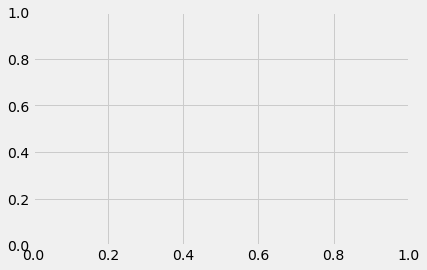

In [200]:
fig, ax = plt.subplots()

part_df.query("index >= 2020 and index < 2022")["New York"].plot(ax = ax2, label= "Participation")
